2536


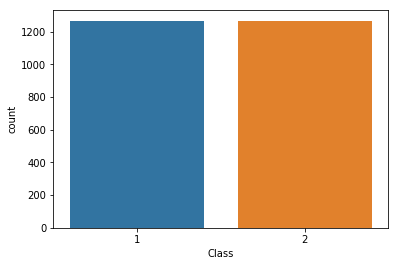

In [49]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression#CV
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
import matplotlib.pyplot as plt
import os
import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split

df = pd.read_csv(os.getcwd()+'/steel_data.csv')

sns.countplot(x="Class", data= df)



df_class1 = df[df.Class==1]
df_class2 = df[df.Class==2]
df_class2_upsampled = sk.utils.resample(df_class2,
                                        replace=True,
                                        n_samples=1268)
df = pd.concat([df_class1, df_class2_upsampled])
print(len(df))
sns.countplot(x="Class", data= df)



X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Class'], test_size=0.49)


#clf.predict([X_test,y_test])

# w = clf.coef_[0]
# print(w)

# a = -w[0] / w[1]

# xx = np.linspace(0,12)
# yy = a * xx - clf.intercept_[0] / w[1]

# h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

# plt.scatter(X[:, 0], X[:, 1], c = y)
# plt.legend()
# plt.show()


In [40]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)

#clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
#print(y2_predicted,y_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.9911504424778761


In [41]:

clf = LogisticRegression()
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.6307320997586484


/home/shashanks/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.6516492357200322


In [43]:
sk.metrics.confusion_matrix(y_test,y2_predicted)

array([[374, 256],
       [177, 436]])

Confusion matrix, without normalization
[[269 364]
 [282 328]]
Normalized confusion matrix
[[0.42 0.58]
 [0.46 0.54]]


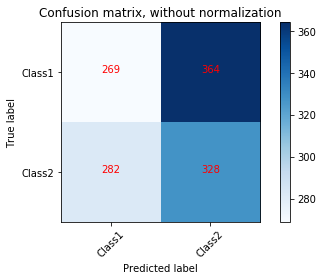

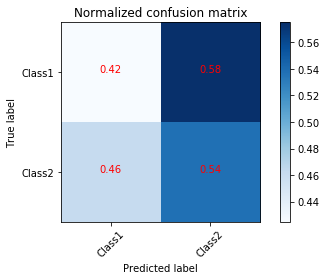

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="Red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names=['Class1','Class2']
# Compute confusion matrix
cnf_matrix = sk.metrics.confusion_matrix(y_test, y2_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()